In [9]:
import networkx as nx
import numpy as np
import scipy as sp
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pylab as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
caltech = nx.read_gml("/content/drive/MyDrive/TSP_Network_Graph/data/Caltech36.gml", destringizer=int)
mit=nx.read_gml("/content/drive/MyDrive/TSP_Network_Graph/data/MIT8.gml", destringizer=int)
jh=nx.read_gml("/content/drive/MyDrive/TSP_Network_Graph/data/Johns Hopkins55.gml", destringizer=int)





In [44]:
g_list = [caltech,mit, jh]
for i in range(len(g_list)):
    g_list[i] = g_list[i].subgraph(max(nx.connected_components(g_list[i]), key=len)).copy()
name_list = ['Caltech','MIT','Johns Hopkins']

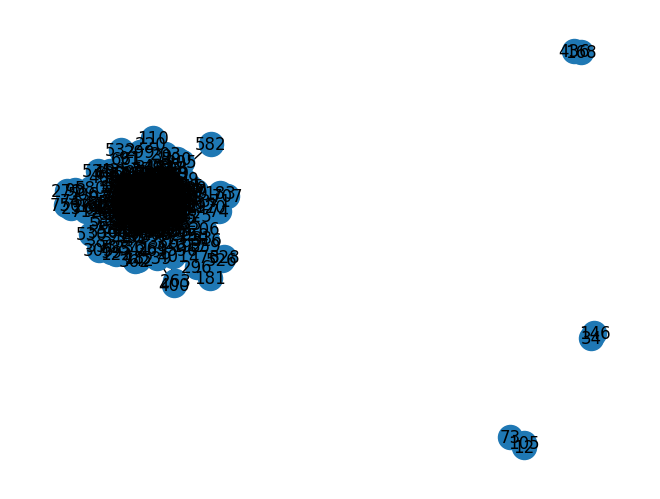

In [45]:
nx.draw(caltech , with_labels=True)
plt.show()

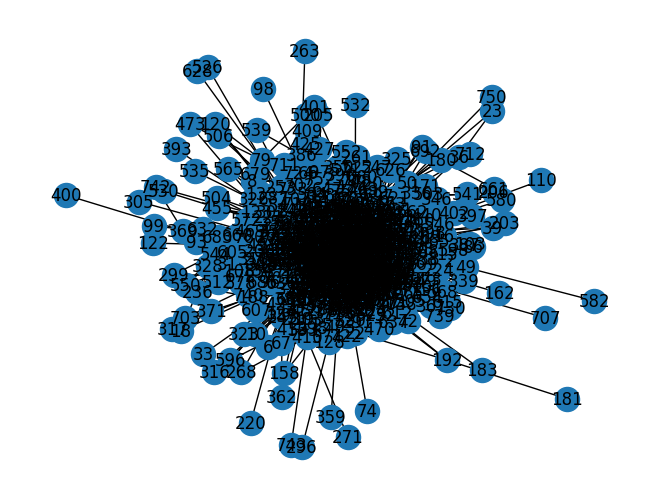

In [46]:
nx.draw(g_list[0] , with_labels=True)
plt.show()

Question 2: Social Network Analysis with the Facebook100 Dataset
The smallest network (Caltech) has 762 nodes in the largest connected component (LCC), and the largest has more than 40000 nodes in the LCC.
Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in the LCC).

(a) For these three networks plot the degree distribution for each of the three net- works that you downloaded. What are you able to conclude from these degree distributions?

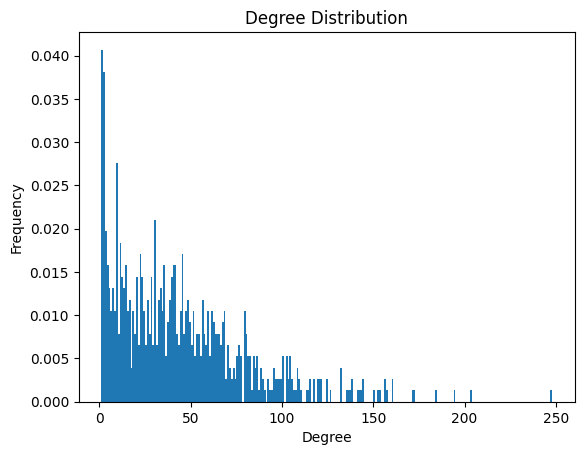

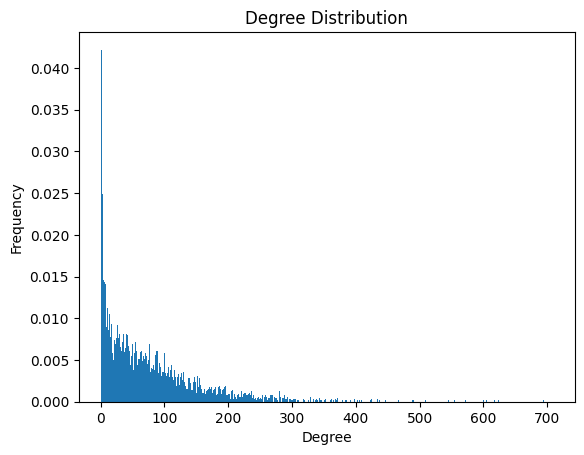

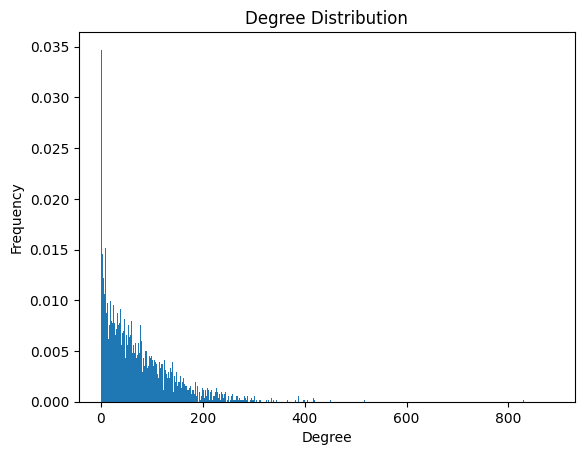

In [47]:
def plot_degree_distribution(G):
    # Get the degrees of all nodes in the graph
    degrees = [deg for node, deg in G.degree()]

    # Plot the degree distribution histogram
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), density=True)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

for g in g_list:
  plot_degree_distribution(g)



(b) Compute the global clustering coefficient and mean local clustering coefficient for each of the 3 networks. In addition compute the edge density of each network. Should either of these networks be construed as sparse? Based on the density information and the clustering information what can you said about the graph topology?

In [48]:
def compute_network_metrics(G):
    global_clustering = nx.transitivity(G)
    mean_local_clustering = nx.average_clustering(G)
    edge_density = nx.density(G)

    print(global_clustering, mean_local_clustering, edge_density)

for g in g_list:
  compute_network_metrics(g)

0.2912809635141533 0.4091173048334614 0.05742892519512591
0.1802884023054581 0.272359996588386 0.012261341741110527
0.19316115952994883 0.2690083618058958 0.0140335136902954


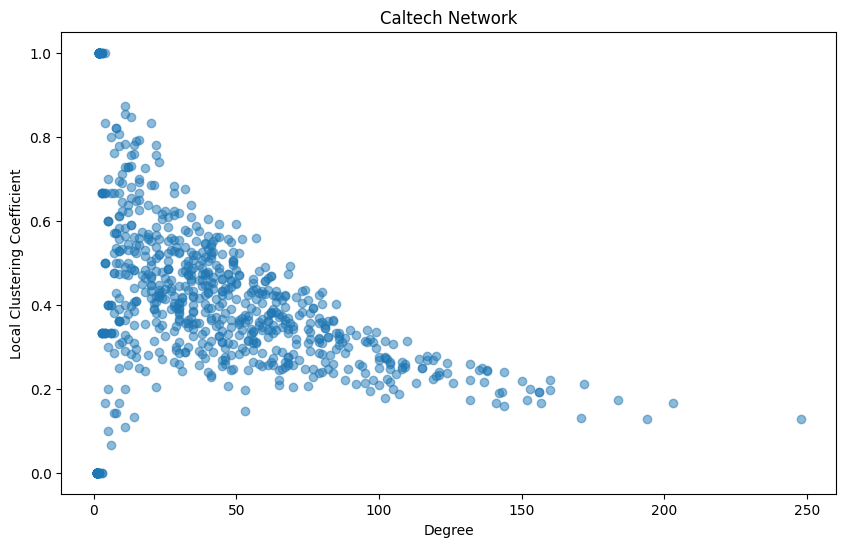

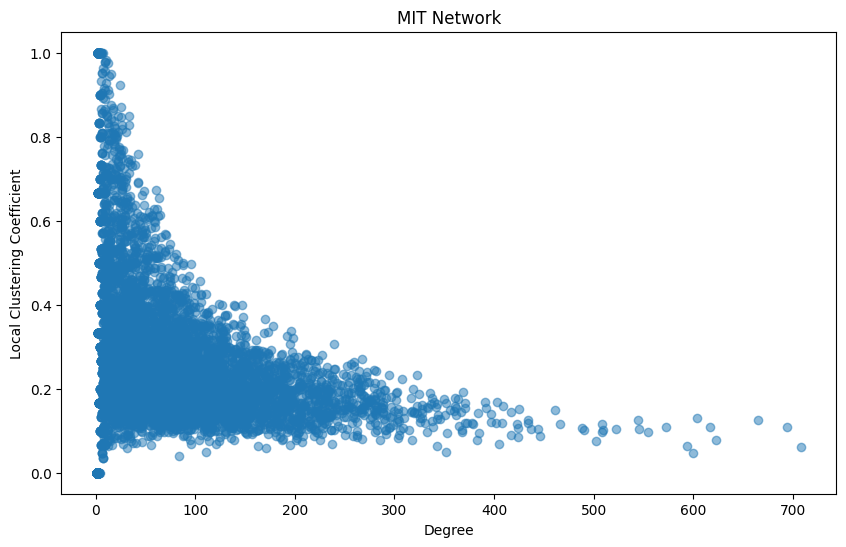

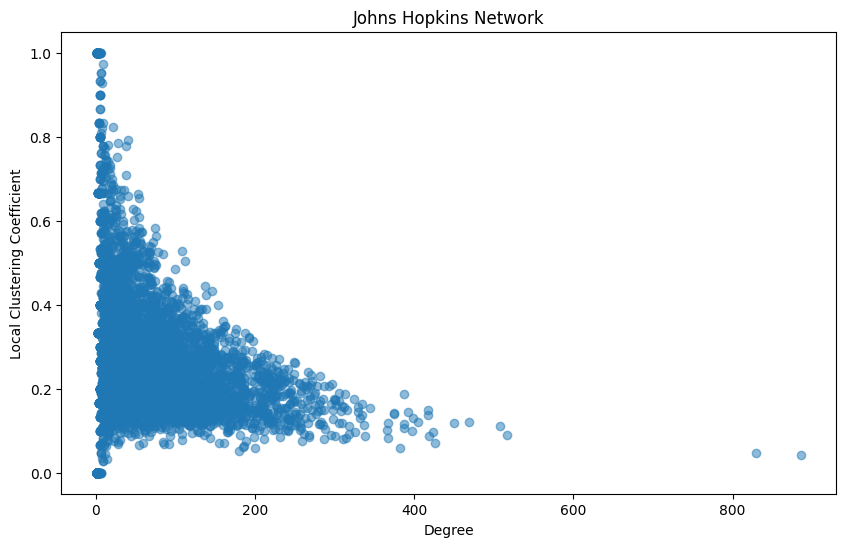

In [49]:
def plot_degree_vs_clustering(G, title):
    degrees = dict(G.degree()).values()
    clustering_coeffs = nx.clustering(G).values()

    plt.figure(figsize=(10, 6))
    plt.scatter(degrees, clustering_coeffs, alpha=0.5)
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    plt.title(title)
    plt.show()

network_titles = ['Caltech Network', 'MIT Network', 'Johns Hopkins Network']
for g, title in zip(g_list, network_titles):
    plot_degree_vs_clustering(g, title)

In this question we expect you will compute the assortativity on a large set of graphs (if possible all the graphs).

In [64]:
directory_path = '/content/drive/MyDrive/TSP_Network_Graph/data/'


import os
import networkx as nx

# Initialize a dictionary to store assortativity data
assortativity_data = []

# Iterate over the network files and process each one
for filename in os.listdir(directory_path):
    if filename.endswith('.gml'):  # Check the file extension according to your data
        network_path = os.path.join(directory_path, filename)

        # Load the network
        network_graph = nx.read_gml(network_path)
        network_graph = network_graph.subgraph(max(nx.connected_components(network_graph), key=len)).copy()

        # Calculate assortativity coefficients and other required metrics
        status_assortativity = nx.attribute_assortativity_coefficient(network_graph, 'student_fac')
        major_assortativity = nx.attribute_assortativity_coefficient(network_graph, 'major_index')
        dorm_assortativity = nx.attribute_assortativity_coefficient(network_graph, 'dorm')
        gender_assortativity = nx.attribute_assortativity_coefficient(network_graph, 'gender')
        degree_assortativity = nx.degree_assortativity_coefficient(network_graph)

        # Add data to the dictionary
        assortativity_data.append({
            'network_name': filename,
            'network_size': len(network_graph),
            'degree_assort': degree_assortativity,
            'status_assort': status_assortativity,
            'major_assort': major_assortativity,
            'dorm_assort': dorm_assortativity,
            'gender_assort': gender_assortativity
        })

# Print the results
for network_info in assortativity_data:
    print(network_info)

{'network_name': 'Virginia63.gml', 'network_size': 21319, 'degree_assort': -0.016074486395657533, 'status_assort': 0.25071907565195084, 'major_assort': 0.05129090437041072, 'dorm_assort': 0.11855125328976142, 'gender_assort': 0.05618498775950475}
{'network_name': 'USC35.gml', 'network_size': 17440, 'degree_assort': 0.005504891411338413, 'status_assort': 0.27569581801374776, 'major_assort': 0.07957502147198152, 'dorm_assort': 0.17743005580178198, 'gender_assort': 0.07246827100611448}
{'network_name': 'Northeastern19.gml', 'network_size': 13868, 'degree_assort': 0.06812004317425678, 'status_assort': 0.27360778517070505, 'major_assort': 0.0970863412546683, 'dorm_assort': 0.15134118467157837, 'gender_assort': -0.0038093513034742404}
{'network_name': 'Trinity100.gml', 'network_size': 2613, 'degree_assort': 0.07190565373550929, 'status_assort': 0.3782911525864028, 'major_assort': 0.0675034394502031, 'dorm_assort': 0.10883910914751317, 'gender_assort': 0.04246312377477926}
{'network_name': 'A

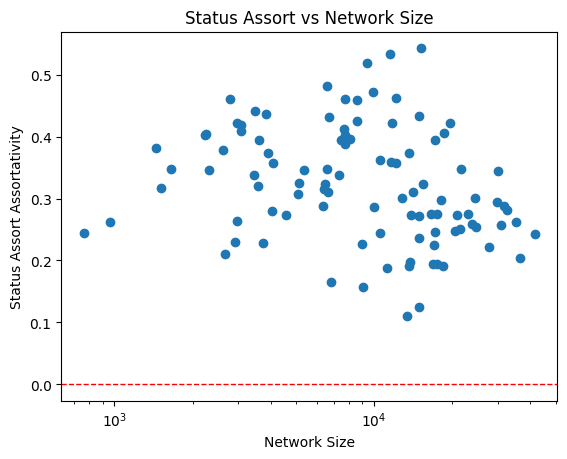

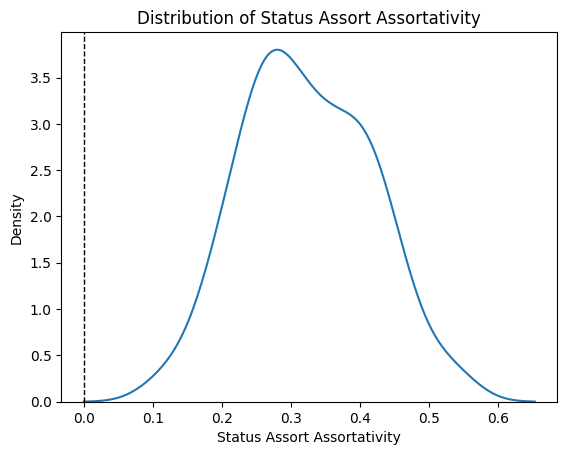

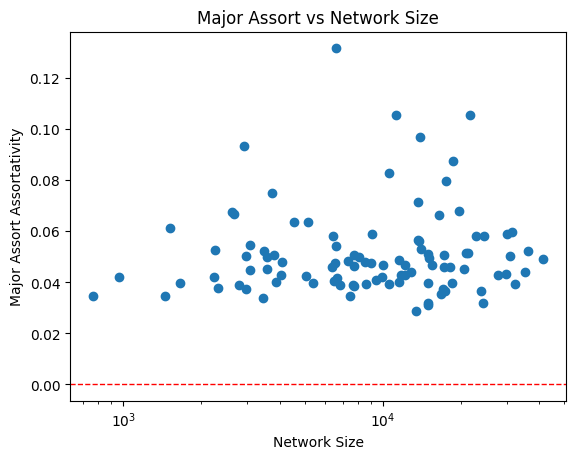

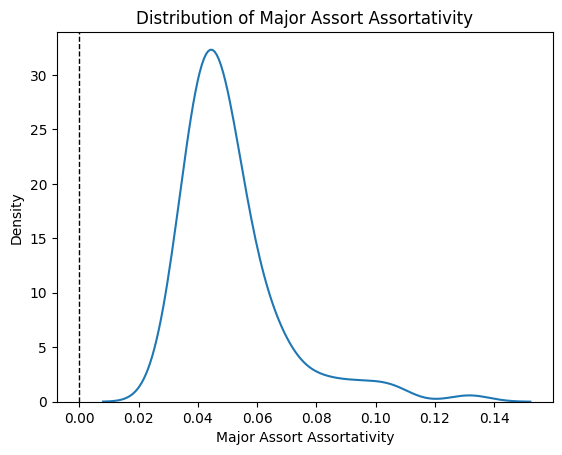

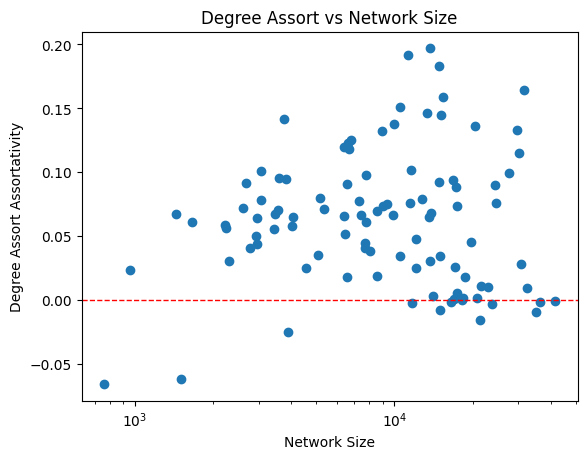

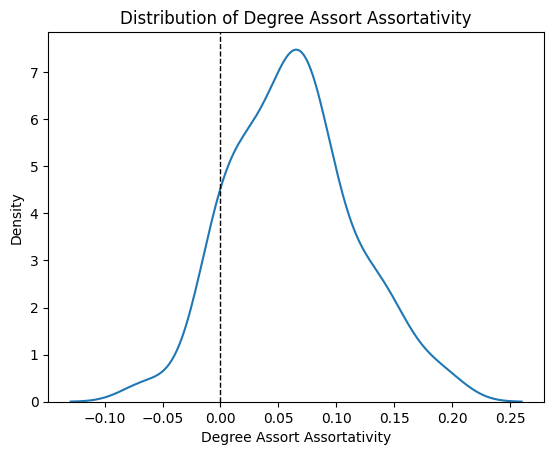

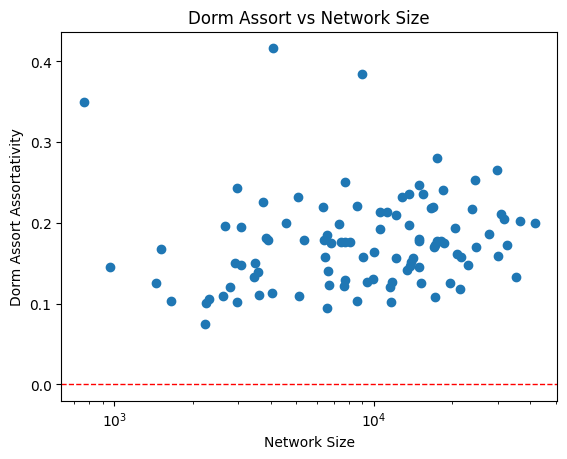

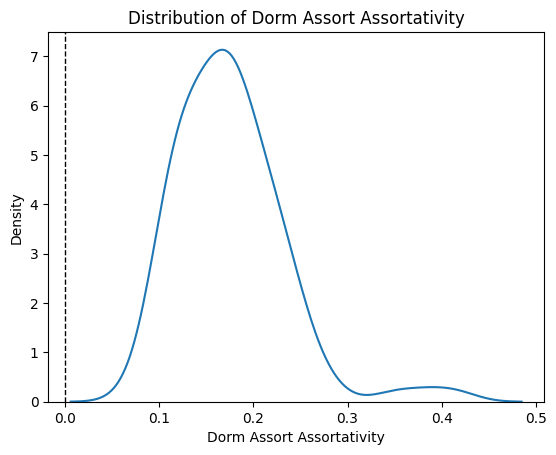

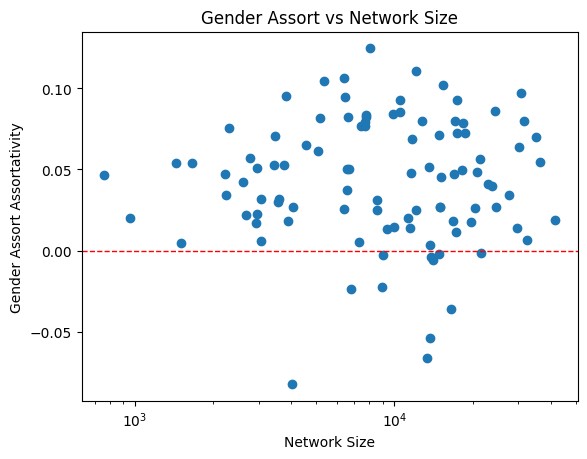

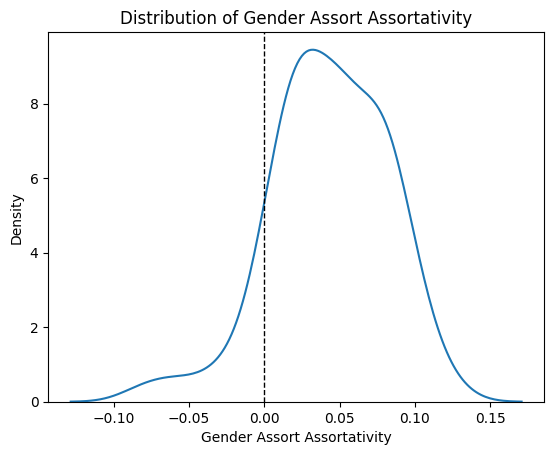

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_assortativity(assortativity_data, attribute_name):
    # 散点图
    sizes = [data['network_size'] for data in assortativity_data]
    assortativities = [data[attribute_name] for data in assortativity_data]
    plt.scatter(sizes, assortativities)
    plt.xscale('log')
    plt.xlabel('Network Size')
    plt.ylabel(f'{attribute_name.replace("_", " ").title()} Assortativity')
    plt.title(f'{attribute_name.replace("_", " ").title()} vs Network Size')
    plt.axhline(0, color='red', linewidth=1, linestyle='--')
    plt.show()

    # 密度图
    sns.kdeplot(assortativities, fill=False)
    plt.xlabel(f'{attribute_name.replace("_", " ").title()} Assortativity')
    plt.ylabel('Density')
    plt.title(f'Distribution of {attribute_name.replace("_", " ").title()} Assortativity')
    plt.axvline(0, color='k', linestyle='dashed', linewidth=1)
    plt.show()

assort_list = ['status_assort','major_assort','degree_assort','dorm_assort','gender_assort']

for i in assort_list:
  plot_assortativity(assortativity_data, i)

Question 4: Link prediction
In this question we expect you will compute the link prediction algorithms on a large set of graphs (> 10).

(a) Read the following documents [4].
(b) Implement the following link prediction metrics: common neighbors, jaccard, Ad- amic/Adar. We use the scikit-learn2 API as an example for our implementation of the link prediction metrics. Please use the implementation (in listing. 1) as an example. Your implementation should inherit from the class LinkPrediction defined in listing. 1. You should implement yourself the given metrics, don’t used the ones defined in Networkx

In [6]:
import networkx as nx
import numpy as np
from abc import ABC, abstractmethod
import progressbar
class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph

    @abstractmethod
    def fit(self, u, v):
        raise NotImplementedError("Fit must be implemented")

class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors , self).__init__(graph)
    def fit(self, u, v):
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        return len(neighbors_u & neighbors_v)

class JaccardCoefficient(LinkPrediction):
    def __init__(self, graph):
        super(JaccardCoefficient , self).__init__(graph)
    def fit(self, u, v):
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        union = neighbors_u | neighbors_v
        intersection = neighbors_u & neighbors_v
        return len(intersection) / len(union) if union else 0

class AdamicAdarIndex(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdarIndex , self).__init__(graph)
    def fit(self, u, v):
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        common_neighbors = neighbors_u & neighbors_v
        return sum(1 / np.log(len(list(self.graph.neighbors(w))))
                   for w in common_neighbors if self.graph.degree(w) > 1)



In [26]:
import time
import progressbar
import networkx as nx

def calculate_link_prediction_metrics(graph, graph_name):
    node_pairs = list(nx.non_edges(graph))
    results = {
        'node_pairs': [],
        'CommonNeighbors': [],
        'JaccardCoefficient': [],
        'AdamicAdarIndex': [],
        'CommonNeighbors_time': [],
        'JaccardCoefficient_time': [],
        'AdamicAdarIndex_time': []
    }

    bar = progressbar.ProgressBar(maxval=len(node_pairs),
                                  widgets=[progressbar.Bar('=', f'[{graph_name}] [', ']'), ' ', progressbar.Percentage()])
    bar.start()

    for i, (u, v) in enumerate(node_pairs):

        start_time = time.time()
        cn = CommonNeighbors(graph)
        cn_result = cn.fit(u, v)
        end_time = time.time()
        cn_time = end_time - start_time


        start_time = time.time()
        jc = JaccardCoefficient(graph)
        jc_result = jc.fit(u, v)
        end_time = time.time()
        jc_time = end_time - start_time


        start_time = time.time()
        aa = AdamicAdarIndex(graph)
        aa_result = aa.fit(u, v)
        end_time = time.time()
        aa_time = end_time - start_time


        results['node_pairs'].append((u, v))
        results['CommonNeighbors'].append(cn_result)
        results['JaccardCoefficient'].append(jc_result)
        results['AdamicAdarIndex'].append(aa_result)
        results['CommonNeighbors_time'].append(cn_time)
        results['JaccardCoefficient_time'].append(jc_time)
        results['AdamicAdarIndex_time'].append(aa_time)

        bar.update(i+1)

    bar.finish()
    return results




In [ ]:
folder_path = '/content/drive/MyDrive/TSP_Network_Graph/data/'
import re

# 列出目录中的文件，并过滤出非gml文件
files = [f for f in os.listdir(folder_path) if f.endswith('.gml')]

# 读取每个.gml文件的图，并存储图的信息和文件名
g_info_list = []

for file in files:
    file_path = os.path.join(folder_path, file)
    graph = nx.read_gml(file_path)
    # 保存图的信息和文件名
    g_info_list.append((graph, file, len(graph)))

# 根据图的节点数量排序，并选择节点数量最少的前15个图
g_info_list_sorted = sorted(g_info_list, key=lambda x: x[2])[:15]

# 分别保存图对象和文件名到两个列表
g_all_list = [info[0] for info in g_info_list_sorted]
file_names_list = [info[1] for info in g_info_list_sorted]

g_all_list, file_names_list

In [67]:
for i in range(len(g_all_list)):
    g_all_list[i] = g_all_list[i].subgraph(max(nx.connected_components(g_all_list[i]), key=len)).copy()


In [68]:
for i in range(len(g_all_list)):
  print(nx.number_connected_components(g_all_list[i]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [33]:
import random
def remove_random_edges(G, fraction):

    num_edges_to_remove = int(fraction * G.number_of_edges())

    edges_to_remove = random.sample(G.edges(), num_edges_to_remove)

    E_removed = G.copy()

    E_removed.remove_edges_from(edges_to_remove)
    return E_removed, edges_to_remove





In [22]:
def compute_precision_recall_top_k(top_k_node_pairs, removed_edges, k):
    # Convert to set for efficient intersection and difference operations
    top_k_set = set(top_k_node_pairs[:k])  # 仅考虑前k个节点对
    removed_set = set(removed_edges)

    # Calculate true positives (TP), false positives (FP), and false negatives (FN)
    TP = len(top_k_set & removed_set)
    FP = len(top_k_set) - TP  # 因为top_k_set已经限制为前k个
    FN = len(removed_set - top_k_set)

    # Compute Precision and Recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Calculate top@k as just the number of true positives
    top_at_k = TP

    return precision, recall, top_at_k

In [74]:

g_list = [g_all_list[0]]

fractions = [0.05, 0.1, 0.15, 0.2]

methods = ['CommonNeighbors','JaccardCoefficient','AdamicAdarIndex']

k = [50,100,200,400]



results = []


for g in g_list:

    for fraction in fractions:

        E_removed, removed_edges = remove_random_edges(g, fraction)


        for method in methods:

            pre = calculate_link_prediction_metrics(E_removed, g)


            for current_k in k:

                predictions = np.array(pre[method])


                top_k_indices = np.argsort(predictions)[-current_k:][::-1]
                top_k_node_pairs = [pre['node_pairs'][i] for i in top_k_indices]


                precision, recall, topk = compute_precision_recall_top_k(top_k_node_pairs, removed_edges, current_k)
                print(fraction,method, current_k ,'\n')
                print("precision: ",precision)
                print("recall: ",recall)
                print("topk: ",topk)


                results.append([(precision, recall, topk), pre])


<ipython-input-33-b23bdb0ad7e2>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges_to_remove)
[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.05 CommonNeighbors 50 

precision:  0.2
recall:  0.01201923076923077
topk:  10
0.05 CommonNeighbors 100 

precision:  0.13
recall:  0.015625
topk:  13
0.05 CommonNeighbors 200 

precision:  0.11
recall:  0.026442307692307692
topk:  22
0.05 CommonNeighbors 400 

precision:  0.0925
recall:  0.04447115384615385
topk:  37


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.05 JaccardCoefficient 50 

precision:  0.12
recall:  0.007211538461538462
topk:  6
0.05 JaccardCoefficient 100 

precision:  0.12
recall:  0.014423076923076924
topk:  12
0.05 JaccardCoefficient 200 

precision:  0.11
recall:  0.026442307692307692
topk:  22
0.05 JaccardCoefficient 400 

precision:  0.11
recall:  0.052884615384615384
topk:  44


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.05 AdamicAdarIndex 50 

precision:  0.18
recall:  0.010817307692307692
topk:  9
0.05 AdamicAdarIndex 100 

precision:  0.13
recall:  0.015625
topk:  13
0.05 AdamicAdarIndex 200 

precision:  0.115
recall:  0.027644230769230768
topk:  23
0.05 AdamicAdarIndex 400 

precision:  0.105
recall:  0.05048076923076923
topk:  42


[Graph with 762 nodes and 16651 edges] [=================================] 100%
[Graph with 762 nodes and 16651 edges] [                                 ]   0%

0.1 CommonNeighbors 50 

precision:  0.28
recall:  0.008408408408408409
topk:  14
0.1 CommonNeighbors 100 

precision:  0.3
recall:  0.018018018018018018
topk:  30
0.1 CommonNeighbors 200 

precision:  0.275
recall:  0.03303303303303303
topk:  55
0.1 CommonNeighbors 400 

precision:  0.215
recall:  0.05165165165165165
topk:  86


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.1 JaccardCoefficient 50 

precision:  0.22
recall:  0.006606606606606606
topk:  11
0.1 JaccardCoefficient 100 

precision:  0.2
recall:  0.012012012012012012
topk:  20
0.1 JaccardCoefficient 200 

precision:  0.175
recall:  0.021021021021021023
topk:  35
0.1 JaccardCoefficient 400 

precision:  0.1825
recall:  0.04384384384384384
topk:  73


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.1 AdamicAdarIndex 50 

precision:  0.32
recall:  0.00960960960960961
topk:  16
0.1 AdamicAdarIndex 100 

precision:  0.31
recall:  0.018618618618618618
topk:  31
0.1 AdamicAdarIndex 200 

precision:  0.285
recall:  0.03423423423423423
topk:  57
0.1 AdamicAdarIndex 400 

precision:  0.2225
recall:  0.05345345345345345
topk:  89


[Graph with 762 nodes and 16651 edges] [=================================] 100%
[Graph with 762 nodes and 16651 edges] [                                 ]   0%

0.15 CommonNeighbors 50 

precision:  0.26
recall:  0.005206247496996396
topk:  13
0.15 CommonNeighbors 100 

precision:  0.28
recall:  0.011213456147376852
topk:  28
0.15 CommonNeighbors 200 

precision:  0.245
recall:  0.01962354825790949
topk:  49
0.15 CommonNeighbors 400 

precision:  0.2275
recall:  0.03644373247897477
topk:  91


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.15 JaccardCoefficient 50 

precision:  0.18
recall:  0.003604325190228274
topk:  9
0.15 JaccardCoefficient 100 

precision:  0.21
recall:  0.00841009211053264
topk:  21
0.15 JaccardCoefficient 200 

precision:  0.185
recall:  0.014817781337605127
topk:  37
0.15 JaccardCoefficient 400 

precision:  0.21
recall:  0.03364036844213056
topk:  84


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.15 AdamicAdarIndex 50 

precision:  0.24
recall:  0.004805766920304365
topk:  12
0.15 AdamicAdarIndex 100 

precision:  0.27
recall:  0.010812975570684821
topk:  27
0.15 AdamicAdarIndex 200 

precision:  0.26
recall:  0.020824989987985584
topk:  52
0.15 AdamicAdarIndex 400 

precision:  0.23
recall:  0.0368442130556668
topk:  92


[Graph with 762 nodes and 16651 edges] [=================================] 100%
[Graph with 762 nodes and 16651 edges] [                                 ]   0%

0.2 CommonNeighbors 50 

precision:  0.36
recall:  0.005405405405405406
topk:  18
0.2 CommonNeighbors 100 

precision:  0.32
recall:  0.00960960960960961
topk:  32
0.2 CommonNeighbors 200 

precision:  0.305
recall:  0.01831831831831832
topk:  61
0.2 CommonNeighbors 400 

precision:  0.2575
recall:  0.030930930930930932
topk:  103


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.2 JaccardCoefficient 50 

precision:  0.08
recall:  0.0012012012012012011
topk:  4
0.2 JaccardCoefficient 100 

precision:  0.15
recall:  0.0045045045045045045
topk:  15
0.2 JaccardCoefficient 200 

precision:  0.17
recall:  0.01021021021021021
topk:  34
0.2 JaccardCoefficient 400 

precision:  0.2175
recall:  0.026126126126126126
topk:  87


[Graph with 762 nodes and 16651 edges] [=================================] 100%


0.2 AdamicAdarIndex 50 

precision:  0.32
recall:  0.004804804804804805
topk:  16
0.2 AdamicAdarIndex 100 

precision:  0.33
recall:  0.00990990990990991
topk:  33
0.2 AdamicAdarIndex 200 

precision:  0.305
recall:  0.01831831831831832
topk:  61
0.2 AdamicAdarIndex 400 

precision:  0.265
recall:  0.03183183183183183
topk:  106


In [72]:
len(results)

48

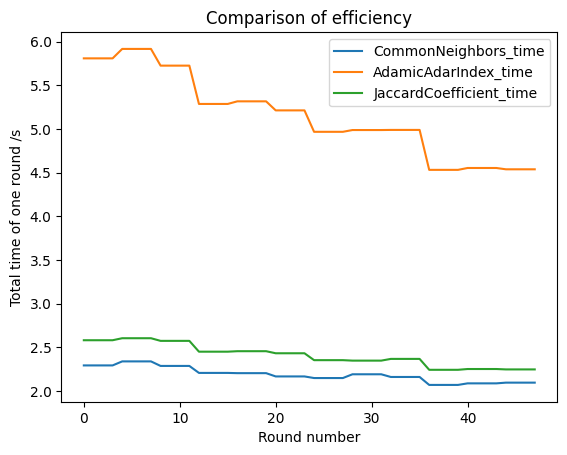

In [87]:
c_total = []
a_total = []
j_total = []
for i in range(len(results)):
  c = sum(results[i][-1]['CommonNeighbors_time'])
  a = sum(results[i][-1]['AdamicAdarIndex_time'])
  j = sum(results[i][-1]['JaccardCoefficient_time'])
  c_total.append(c)
  a_total.append(a)
  j_total.append(j)


plt.plot(c_total, label='CommonNeighbors_time')
plt.plot(a_total, label='AdamicAdarIndex_time')
plt.plot(j_total, label='JaccardCoefficient_time')


plt.legend()


plt.title('Comparison of efficiency')
plt.xlabel('Round number')
plt.ylabel('Total time of one round /s')


plt.show()

In [82]:
print(sum(results[1][-1]['CommonNeighbors_time']))
print(sum(results[1][-1]['AdamicAdarIndex_time']))
print(sum(results[1][-1]['JaccardCoefficient_time']))

2.291515588760376
5.80886697769165
2.5799660682678223


In [62]:
results[1][0]

(0.285, 0.00956616598137115, 114)

In [49]:
common_neighbors = np.array(pre['CommonNeighbors'])

# 获取按CommonNeighbors排序的索引，取前50个最大值的索引（或者全部，如果不足50个）
top_50_indices = np.argsort(common_neighbors)[-50:][::-1]

# 根据这些索引，获取对应的node_pairs
top_50_node_pairs = [pre['node_pairs'][i] for i in top_50_indices]
precision, recall ,topk= compute_precision_recall_top_k(top_50_node_pairs, removed_edges,50)
precision, recall,topk

(0.48, 0.028846153846153848, 24)

In [38]:
a = sum(pre['AdamicAdarIndex_time'])
b = sum(pre['JaccardCoefficient_time'])
print(a,b)

5.049376010894775 2.436413049697876
